In [1]:
%pip install -qU langchain-community beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [13]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://en.wikipedia.org/wiki/Hamburger")

load=loader.load()

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [14]:
load[0]

Document(metadata={'source': 'https://en.wikipedia.org/wiki/Hamburger', 'title': 'Hamburger - Wikipedia', 'language': 'en'}, page_content='\n\n\n\nHamburger - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload fileSpecial pages\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAppearance\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDonate\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\nDonate Create account Log in\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContents\nmove to sidebar\nhide\n\n\n\n\n(Top)\n\n\n\n\n\n1\nEtymology and terminology\n\n\n\n\n\n\n\n\n2\nHistory\n\n\n\n\nToggle History subsection

In [15]:
load[0].metadata.get("title")


'Hamburger - Wikipedia'

In [16]:
print(load[0].page_content)






Hamburger - Wikipedia





























Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages



















Search











Search






















Appearance
















Donate

Create account

Log in








Personal tools





Donate Create account Log in




























Contents
move to sidebar
hide




(Top)





1
Etymology and terminology








2
History




Toggle History subsection





2.1
Claims of invention






2.1.1
Louis Lassen








2.1.2
Charlie Nagreen








2.1.3
Otto Krause








2.1.4
Oscar Weber Bilby








2.1.5
Frank and Charles Menches








2.1.6
Fletcher Davis








2.1.7
Other hamburger-steak claims










2.2
Early major vendors










3
In the United States




Toggle In the United States subsecti

In [17]:
content = load[0].page_content
lines = content.split("\n")  # split by newline
for line in lines[:20]:      # show first 20 lines
    print(line)







Hamburger - Wikipedia

















In [18]:
print(content[:1000])  # first 1000 characters






Hamburger - Wikipedia





























Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages



















Search











Search






















Appearance
















Donate

Create account

Log in








Personal tools





Donate Create account Log in




























Contents
move to sidebar
hide




(Top)





1
Etymology and terminology








2
History




Toggle History subsection





2.1
Claims of invention






2.1.1
Louis Lassen








2.1.2
Charlie Nagreen








2.1.3
Otto Krause








2.1.4
Oscar Weber Bilby








2.1.5
Frank and Charles Menches








2.1.6
Fletcher Davis








2.1.7
Other hamburger-steak claims










2.2
Early major vendors










3
In the United States




Toggle In the United States subsecti

In [19]:
from bs4 import BeautifulSoup
import requests

url = "https://en.wikipedia.org/wiki/Hamburger"
headers = {"User-Agent": "Mozilla/5.0"}

# Fetch the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Grab all paragraphs inside the main content
content_div = soup.find("div", {"id": "mw-content-text"})
paragraphs = content_div.find_all("p") if content_div else []

# Combine all non-empty paragraphs into one string
full_text = "\n\n".join(p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True))

# Page title
title = soup.find("h1").get_text(strip=True)

print("Title:", title)
print("Full text length:", len(full_text))  # just to check size


Title: Hamburger
Full text length: 29370


In [20]:
def chunk_text(text, chunk_size=500, overlap=50):
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunk = text[start:end]
        chunks.append(chunk)
        start += chunk_size - overlap  # move forward but keep some overlap
    return chunks

chunks = chunk_text(full_text, chunk_size=500, overlap=50)


In [21]:
for i, chunk in enumerate(chunks[:3]):
    print(f"--- Chunk {i+1} ---")
    print(chunk, "\n")

--- Chunk 1 ---
Ahamburger, often known as aburger, consists of fillings—usually apattyof ground meat, typicallybeef—placed inside a slicedbun, sesame seed bun, orbread roll. The patties are often served with lettuce, tomato, onion, pickles, bacon, or chilis. The filling of the burger can be topped withcondimentssuch as ketchup, mustard, mayonnaise,relishor a "special sauce", often a variation ofThousand Island dressing. A burger with the patty topped with cheese is called acheeseburger.[1]Under some definition 

--- Chunk 2 ---
e is called acheeseburger.[1]Under some definitions, a hamburger is considered asandwich.

Hamburgers are typically associated withfast-food restaurantsanddinersbut are also sold at other restaurants, including high-end establishments. There are many international and regionalvariationsof hamburgers. Some of the largest multinational fast-food chains feature burgers as one of their core products:McDonald'sBig MacandBurger King'sWhopperhave become global icons o

In [22]:
!pip install sentence-transformers



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from sentence_transformers import SentenceTransformer


embeding=SentenceTransformer('all-MiniLM-L6-v2')

In [24]:
chunk_embeddings = embeding.encode(chunks, show_progress_bar=True)
print("Number of embeddings:", len(chunk_embeddings))
print("Embedding size:", len(chunk_embeddings[0]))

Batches: 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

Number of embeddings: 66
Embedding size: 384


In [25]:
!pip install qdrant-client


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


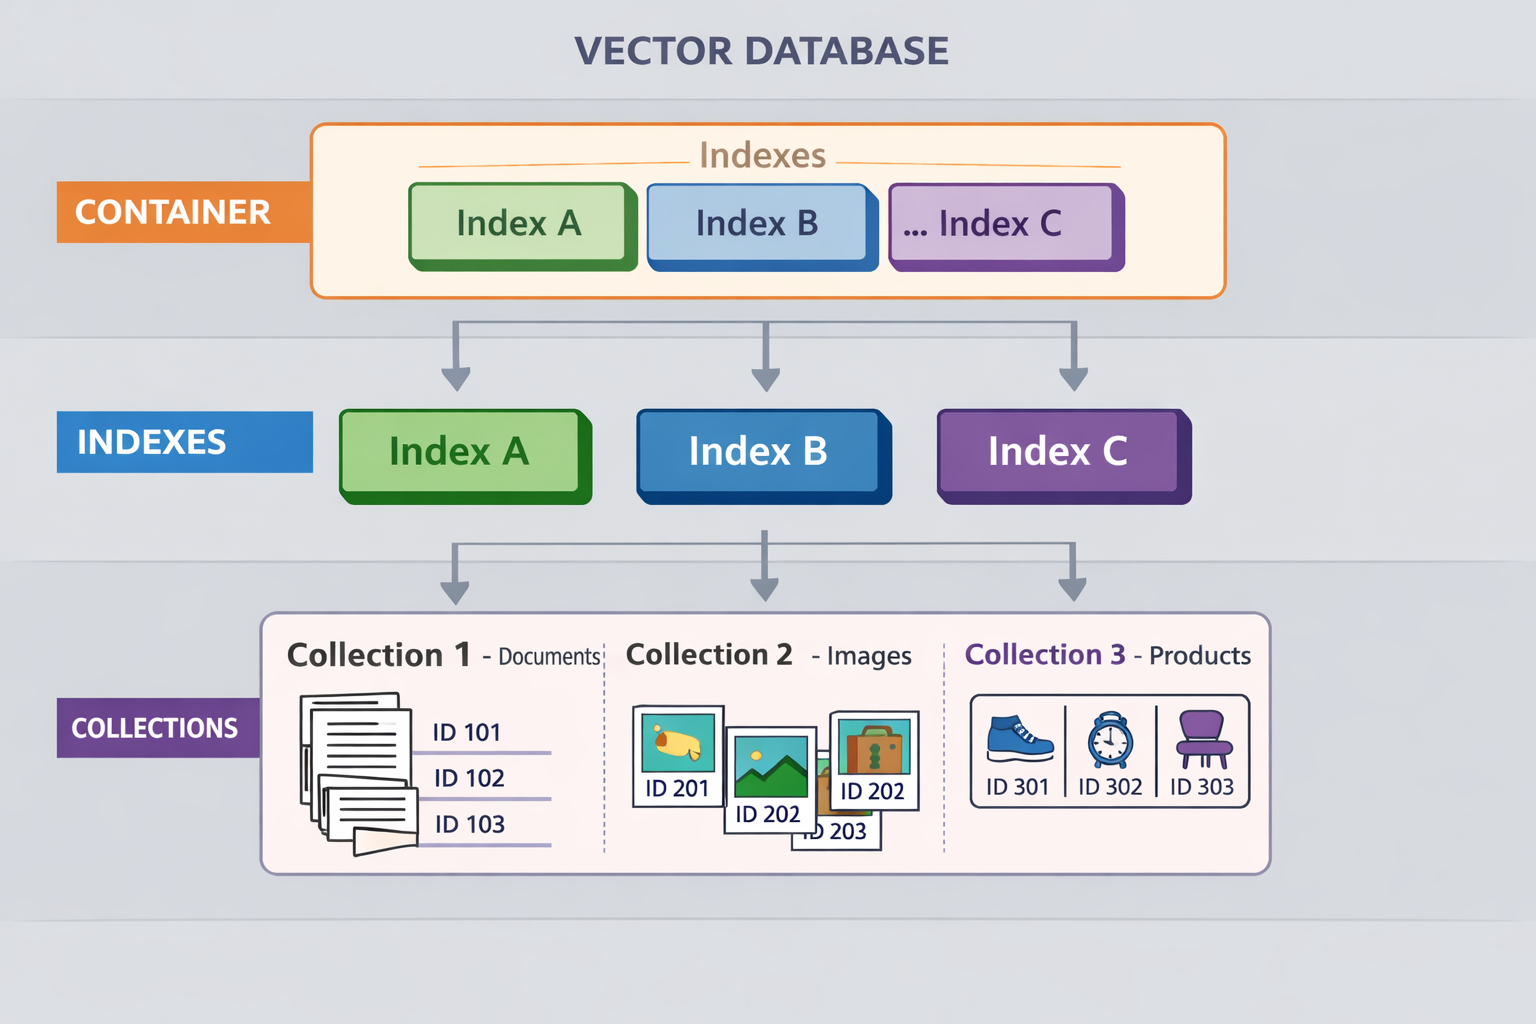

In [26]:
# Import the Qdrant client and the models needed to define a collection
from qdrant_client import QdrantClient
from qdrant_client.models import VectorParams, Distance
import os
from dotenv import load_dotenv

load_dotenv(dotenv_path="dev.env")

# Connect to your Qdrant database
# Replace with your actual Qdrant cluster URL and API key
client = QdrantClient(
    url=os.getenv("Url") ,               # Qdrant cloud URL
    api_key=os.getenv("Qdrant")          # Your personal API key
)

#  Choose a name for your collection 
collection_name = "webscrap_docs"

# Check if collection already exists
existing_collections = [col.name for col in client.get_collections().collections]

if collection_name not in existing_collections:
    client.create_collection(
        collection_name=collection_name,
        vectors_config=VectorParams(
            size=384,
            distance=Distance.COSINE
        )
    )
    print(f"Collection '{collection_name}' created successfully.")
else:
    print(f"Collection '{collection_name}' already exists. Skipping creation.")



Collection 'webscrap_docs' already exists. Skipping creation.


In [27]:
from qdrant_client.models import PointStruct
import uuid

points = []

for i, emb in enumerate(chunk_embeddings):
    points.append(
        PointStruct(
            id=str(uuid.uuid4()),      # unique ID
            vector=emb,                # embedding vector for this chunk
            payload={"text": chunks[i]}  # original text
        )
    )

client.upsert(
    collection_name=collection_name,
    points=points
)
print(f"{len(points)} points upserted to Qdrant collection '{collection_name}'")


66 points upserted to Qdrant collection 'webscrap_docs'


In [28]:
query = input("what is your question?")
query_vector = embeding.encode([query])[0]  

In [29]:
query_vector

array([-2.50936262e-02, -7.46343657e-02,  1.01417387e-02,  1.56520121e-02,
       -3.99164855e-02,  9.35014710e-03, -3.25272419e-02,  3.70090306e-02,
       -5.12432447e-03, -1.68089159e-02, -3.66081693e-03,  1.23477075e-02,
       -1.13224477e-01,  7.21025914e-02, -6.06075395e-03, -2.25710757e-02,
        1.21422894e-01,  2.63928380e-02,  1.00230642e-01, -5.91351092e-02,
        3.48345004e-02, -8.22301582e-02,  3.01251877e-02,  1.19552603e-02,
        4.16113883e-02,  4.38977126e-03,  2.02420056e-02,  4.99471948e-02,
       -2.32269987e-02, -1.02086864e-01, -1.24051891e-01, -4.56850044e-02,
       -2.97767054e-02, -7.20175505e-02, -7.28630275e-02, -3.34355608e-02,
        5.62952124e-02, -2.68622227e-02,  4.87009101e-02,  4.13951613e-02,
       -1.63516272e-02,  6.12547472e-02,  6.55434728e-02, -3.77428276e-03,
       -1.37256263e-02, -6.81603178e-02, -3.32509838e-02,  8.22699219e-02,
       -1.10992817e-02, -6.74421573e-03, -2.64097583e-02, -2.89374106e-02,
       -6.04176298e-02, -

In [35]:
from qdrant_client import QdrantClient

# Perform query
results = client.query_points(
    collection_name="webscrap_docs",
    query=query_vector,
    limit=5,
    with_payload=True
)



In [39]:
# results is a list of ScoredPoint objects returned by client.search()
# 'results' is a QueryResponse object returned by client.search()
points = results.points  # this is a list of ScoredPoint objects

# Extract text from payload
top_chunks = [point.payload['text'] for point in points if 'text' in point.payload]

# Combine into a single context string
context = " ".join(top_chunks)

print(context)



are often prepared with a variety of toppings, includinglettuce,tomato,onion, and often slicedpickles(or pickle relish).French fries(or commonlypoutinein Canada) often accompany the burger.Cheese(usuallyprocessed cheese slicesbut oftenCheddar,Swiss,pepper jack, orblue), may be either melted directly on the meat patty or crumbled on top.[citation needed]

Condimentsmight be added to a hamburger or may be offered separately on the side, includingketchup,mustard,mayonnaise,relish, salad dressings a are often prepared with a variety of toppings, includinglettuce,tomato,onion, and often slicedpickles(or pickle relish).French fries(or commonlypoutinein Canada) often accompany the burger.Cheese(usuallyprocessed cheese slicesbut oftenCheddar,Swiss,pepper jack, orblue), may be either melted directly on the meat patty or crumbled on top.[citation needed]

Condimentsmight be added to a hamburger or may be offered separately on the side, includingketchup,mustard,mayonnaise,relish, salad dressings 

In [ ]:
!pip install langchain_google_genai

  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached langchain_core-1.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached websockets-15.0.1-cp313-cp313-win_amd64.whl.metadata (7.0 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached pyasn1_modules-0.4.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pyyaml-6.0.3-cp313-cp313-win_amd64.whl.metadata (2.4 kB)
  Using cached uuid_utils-0.12.0-cp39-abi3-win_amd64.whl.metadata (1.1 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached zstandard-0.25.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
huggingface-hub 0.36.0 requires filelock, which is not installed.
huggingface-hub 0.36.0 requires fsspec>=2023.5.0, which is not installed.
huggingface-hub 0.36.0 requires tqdm>=4.42.1, which is not installed.
langchain-classic 1.0.0 requires sqlalchemy<3.0.0,>=1.4.0, which is not installed.
langchain-community 0.4.1 requires aiohttp<4.0.0,>=3.8.3, which is not installed.
langchain-community 0.4.1 requires SQLAlchemy<3.0.0,>=1.4.0, which is not installed.
sentence-transformers 5.2.0 requires scikit-learn, which is not installed.
sentence-transformers 5.2.0 requires scipy, which is not installed.
sentence-transformers 5.2.0 requires tqdm, which is not installed.
transformers 4.57.3 requires filelock, which is not installed.
transformers 4.57.3 requires regex!=2019.12.17, which is not installed.
transformers 4.57.3 

In [40]:
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv(dotenv_path="dev.env")

llm = ChatGoogleGenerativeAI(model="gemini-2.5-pro",api_key=os.getenv("GOOGLE_API_KEY"))

prompt=f""""i have provided you the context and the question. look the contex carefully and give the correct answer 
        for the given question. dont provide any extra information other than the answer.
        if you dont find the answer in the context, simply reply with 'i dont know the answer'. and please add the preamble according to user question
        context:{results} \n
        question:{query}"""

answer=llm.invoke(prompt)


ChatGoogleGenerativeAIError: Error calling model 'gemini-2.5-pro' (RESOURCE_EXHAUSTED): 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.5-pro\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.5-pro\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0, model: gemini-2.5-pro\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0, model: gemini-2.5-pro\nPlease retry in 43.146311642s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-pro'}}, {'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'model': 'gemini-2.5-pro', 'location': 'global'}}, {'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_input_token_count', 'quotaId': 'GenerateContentInputTokensPerModelPerMinute-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-pro'}}, {'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_input_token_count', 'quotaId': 'GenerateContentInputTokensPerModelPerDay-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-pro'}}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '43s'}]}}